In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import neighbors
from sklearn import discriminant_analysis
from sklearn.linear_model import lasso_path
from itertools import cycle
import itertools as it
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("C:\\Users\\KD\\OneDrive\\Machine Learning\\Project\\Dataset\\final_train.csv", header=0)
data_test = pd.read_csv("C:\\Users\\KD\\OneDrive\\Machine Learning\\Project\\Dataset\\final_test.csv", header=0)

fractionOfTraining = 0.7
mask = np.random.rand(len(data)) < fractionOfTraining
data_train = data[mask]
data_validation = data[~mask]


data_train = pd.get_dummies(data_train, columns=['CAT_EARN'])
data_validation = pd.get_dummies(data_validation, columns=['CAT_EARN'])
data_test = pd.get_dummies(data_test, columns=['CAT_EARN'])
from sklearn import decomposition
pca = decomposition.PCA(n_components = 'mle', svd_solver='full')

In [7]:
columns = list(data_train.columns.values)

# data_train.head
filterList = ['MN_EARN_WNE_P10','CAT_EARN_0','CAT_EARN_1','CAT_EARN_2','PREDDEG','LOCALE','CONTROL']
Y_column_categorical = 'CAT_EARN'
X_columns = list(filter(lambda x:x not in filterList, columns))

X = data_train[X_columns]
Y_0 = data_train.CAT_EARN_0
Y_1 = data_train.CAT_EARN_1
Y_2 = data_train.CAT_EARN_2

X_val = data_validation[X_columns]
Y_0_val = data_validation.CAT_EARN_0
Y_1_val = data_validation.CAT_EARN_1
Y_2_val = data_validation.CAT_EARN_2


X_test = data_test[list(filter(lambda x:x not in filterList, list(data_test.columns.values)))]
Y_test_0 = data_test.CAT_EARN_0
Y_test_1 = data_test.CAT_EARN_1
Y_test_2 = data_test.CAT_EARN_2


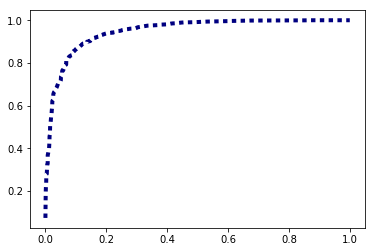

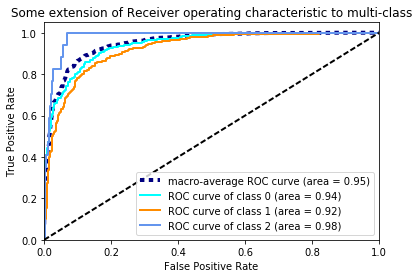

In [12]:
#                                 LOGISTIC REGRESSION

# ----------------------------------------- CAT_0
LRModel = linear_model.LogisticRegression()
LRModel_pca = linear_model.LogisticRegression()


Y = Y_0
fList = ['MN_EARN_WNE_P10','CAT_EARN_0','CAT_EARN_1','CAT_EARN_2','PREDDEG','LOCALE','CONTROL']
X = data_train[list(filter(lambda x:x not in fList, columns))]

LRModel.fit(X, Y)

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

# ROC ON VALIDATION

ROCX = X_val
ROCY = Y_0_val
scores = LRModel.predict_proba(ROCX)

fpr[0], tpr[0], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[0] = metrics.auc(fpr[0],tpr[0])

# -------------------------------------------- CAT_1
LRModel = linear_model.LogisticRegression()
Y = Y_1
fList = ['MN_EARN_WNE_P10','CAT_EARN_0','CAT_EARN_1','CAT_EARN_2','PREDDEG','LOCALE','CONTROL']
X = data_train[list(filter(lambda x:x not in fList, columns))]
LRModel.fit(X, Y)

# ROC ON VALIDATION

ROCX = X_val
ROCY = Y_1_val
scores = LRModel.predict_proba(ROCX)

fpr[1], tpr[1], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[1] = metrics.auc(fpr[1],tpr[1])

# -------------------------------------------- CAT_2
LRModel = linear_model.LogisticRegression()
Y = Y_2
fList = ['MN_EARN_WNE_P10','CAT_EARN_0','CAT_EARN_1','CAT_EARN_2','PREDDEG','LOCALE','CONTROL']
X = data_train[list(filter(lambda x:x not in fList, columns))]
LRModel.fit(X, Y)
# ROC ON VALIDATION
ROCX = X_val
ROCY = Y_2_val
scores = LRModel.predict_proba(ROCX)

fpr[2], tpr[2], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[2] = metrics.auc(fpr[2],tpr[2])
# ###################################### MACRO-AVERAGE PLOT#####################################
n_classes = 3
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

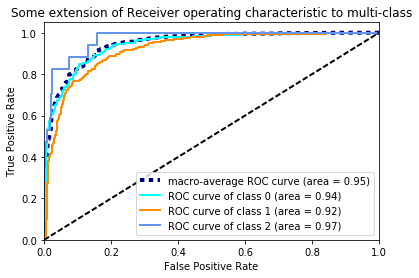

In [13]:
#                               LOGISTIC REGRESSION : PRINCIPAL COMPONENTS

# PCA - CAT_0

LRModel_pca = linear_model.LogisticRegression()
pipe_pca = Pipeline([('scaling',StandardScaler()),('pca',pca),('logistic',LRModel_pca)])

Y = Y_0
fList = ['MN_EARN_WNE_P10','CAT_EARN_0','CAT_EARN_1','CAT_EARN_2','PREDDEG','LOCALE','CONTROL']
X = data_train[list(filter(lambda x:x not in fList, columns))]

pipe_pca.fit(X,Y)

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

# ROC ON VALIDATION

ROCX = X_val
ROCY = Y_0_val
scores = pipe_pca.predict_proba(ROCX)

fpr[0], tpr[0], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[0] = metrics.auc(fpr[0],tpr[0])

# ----------------------------------------------------- PCA - CAT_1
LRModel_pca = linear_model.LogisticRegression()
pipe_pca = Pipeline([('scaling',StandardScaler()),('pca',pca),('logistic',LRModel_pca)])

Y = Y_1
fList = ['MN_EARN_WNE_P10','CAT_EARN_0','CAT_EARN_1','CAT_EARN_2','PREDDEG','LOCALE','CONTROL']
X = data_train[list(filter(lambda x:x not in fList, columns))]

pipe_pca.fit(X,Y)

# ROC ON VALIDATION

ROCX = X_val
ROCY = Y_1_val
scores = pipe_pca.predict_proba(ROCX)

fpr[1], tpr[1], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[1] = metrics.auc(fpr[1],tpr[1])

# -------------------------------------------------- PCA - CAT_2
LRModel_pca = linear_model.LogisticRegression()
pipe_pca = Pipeline([('scaling',StandardScaler()),('pca',pca),('logistic',LRModel_pca)])

Y = Y_2
fList = ['MN_EARN_WNE_P10','CAT_EARN_0','CAT_EARN_1','CAT_EARN_2','PREDDEG','LOCALE','CONTROL']
X = data_train[list(filter(lambda x:x not in fList, columns))]

pipe_pca.fit(X,Y)
# ROC ON VALIDATION

ROCX = X_val
ROCY = Y_2_val
scores = pipe_pca.predict_proba(ROCX)

fpr[2], tpr[2], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[2] = metrics.auc(fpr[2],tpr[2])

# ###################################### MACRO-AVERAGE PLOT#####################################
n_classes = 3
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [95]:
# LINEAR DISCRIMINANT ANALYSIS

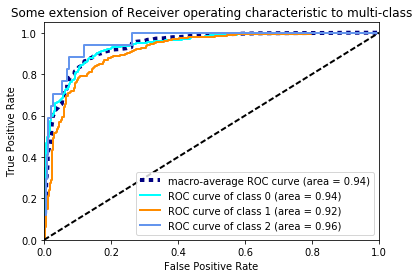

In [14]:
#                            LDA 



fList = ['MN_EARN_WNE_P10','CAT_EARN_0','CAT_EARN_1','CAT_EARN_2','PREDDEG','LOCALE','CONTROL','HCM2','HBCU','PBI','ANNHI','TRIBAL','AANAPII','HSI','NANTI','MENONLY','WOMENONLY','RELAFFIL','DISTANCEONLY','CURROPER']

# --------------------------------------------------------- CAT_0
LDAModel = discriminant_analysis.LinearDiscriminantAnalysis()

Y = Y_0
X = data_train[list(filter(lambda x:x not in fList, columns))]
LDAModel.fit(X, Y)

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
X_val = data_validation[list(filter(lambda x:x not in fList, list(data_validation.columns.values)))]
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

# ROC ON VALIDATION
ROCX = X_val
ROCY = Y_0_val
scores = LDAModel.predict_proba(ROCX)
fpr[0], tpr[0], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[0] = metrics.auc(fpr[0],tpr[0])

#  ---------------------------------------------------- CAT_1

LDAModel = discriminant_analysis.LinearDiscriminantAnalysis()

Y = Y_1
X = data_train[list(filter(lambda x:x not in fList, columns))]
LDAModel.fit(X, Y)

# ROC ON VALIDATION

ROCX = X_val
ROCY = Y_1_val
scores = LDAModel.predict_proba(ROCX)
fpr[1], tpr[1], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[1] = metrics.auc(fpr[1],tpr[1])

# ------------------------------------------------------ CAT_2

LDAModel = discriminant_analysis.LinearDiscriminantAnalysis()

Y = Y_2
X = data_train[list(filter(lambda x:x not in fList, columns))]
LDAModel.fit(X, Y)


# ROC ON VALIDATION
ROCX = X_val
ROCY = Y_2_val
scores = LDAModel.predict_proba(ROCX)
fpr[2], tpr[2], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[2] = metrics.auc(fpr[2],tpr[2])

# ###################################### MACRO-AVERAGE PLOT#####################################
n_classes = 3
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



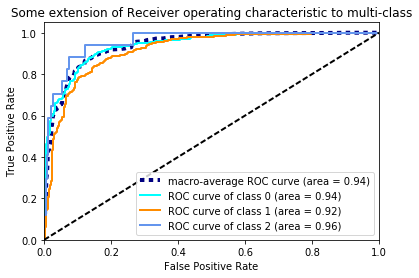

In [22]:
#                                        LDA : Principal Components
# PCA - CAT_0
LDAModel_pca = discriminant_analysis.LinearDiscriminantAnalysis()
pipe_pca = Pipeline([('scaling',StandardScaler()),('pca',pca),('lda',LDAModel_pca)])

Y = Y_0
fList = ['MN_EARN_WNE_P10','CAT_EARN_0','CAT_EARN_1','CAT_EARN_2','PREDDEG','LOCALE','CONTROL','HCM2','HBCU','PBI','ANNHI','TRIBAL','AANAPII','HSI','NANTI','MENONLY','WOMENONLY','RELAFFIL','DISTANCEONLY','CURROPER']
X = data_train[list(filter(lambda x:x not in fList, columns))]

pipe_pca.fit(X,Y)


# ROC ON VALIDATION

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
X_val = data_validation[list(filter(lambda x:x not in fList, list(data_validation.columns.values)))]
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

# ROC ON VALIDATION
ROCX = X_val
ROCY = Y_0_val
scores = pipe_pca.predict_proba(ROCX)
fpr[0], tpr[0], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[0] = metrics.auc(fpr[0],tpr[0])

# ------------------------------------------------------ PCA - CAT_1
LDAModel_pca = discriminant_analysis.LinearDiscriminantAnalysis()
pipe_pca = Pipeline([('scaling',StandardScaler()),('pca',pca),('lda',LDAModel_pca)])

Y = Y_1

X = data_train[list(filter(lambda x:x not in fList, columns))]

pipe_pca.fit(X,Y)

# ROC ON VALIDATION
ROCX = X_val
ROCY = Y_1_val
scores = pipe_pca.predict_proba(ROCX)
fpr[1], tpr[1], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[1] = metrics.auc(fpr[1],tpr[1])

# ------------------------------------------------------ PCA - CAT_2
LDAModel_pca = discriminant_analysis.LinearDiscriminantAnalysis()
pipe_pca = Pipeline([('scaling',StandardScaler()),('pca',pca),('lda',LDAModel_pca)])

Y = Y_2
X = data_train[list(filter(lambda x:x not in fList, columns))]

pipe_pca.fit(X,Y)

# ROC ON VALIDATION
ROCX = X_val
ROCY = Y_2_val
scores = pipe_pca.predict_proba(ROCX)
fpr[2], tpr[2], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[2] = metrics.auc(fpr[2],tpr[2])

# ###################################### MACRO-AVERAGE PLOT#####################################
n_classes = 3
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

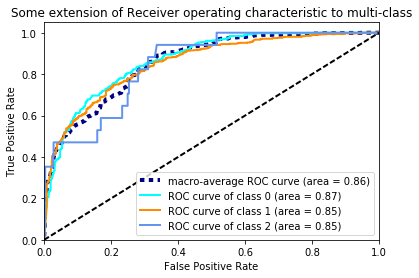

In [21]:
#                                            BERNOUILLI NAIVE - BAYES

from sklearn.naive_bayes import BernoulliNB
fList = ['MN_EARN_WNE_P10','CAT_EARN_0','CAT_EARN_1','CAT_EARN_2','PREDDEG','LOCALE','CONTROL']
X = data_train[list(filter(lambda x:x not in fList, columns))]

# ------------------------------------------- CAT_0
NBModel = BernoulliNB()
Y = Y_0
NBModel.fit(X, Y)

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
X_val = data_validation[X_columns]
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

# ROC ON VALIDATION

ROCX = X_val
ROCY = Y_0_val
scores = NBModel.predict_proba(ROCX)

fpr[0], tpr[0], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[0] = metrics.auc(fpr[0],tpr[0])

# ------------------------------------------- CAT_1
NBModel = BernoulliNB()
Y = Y_1
NBModel.fit(X, Y)
# ROC ON VALIDATION

ROCX = X_val
ROCY = Y_1_val
scores = NBModel.predict_proba(ROCX)

fpr[1], tpr[1], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[1] = metrics.auc(fpr[1],tpr[1])

# ------------------------------------------- CAT_1
NBModel = BernoulliNB()
Y = Y_2
NBModel.fit(X, Y)
# ROC ON VALIDATION

ROCX = X_val
ROCY = Y_2_val
scores = NBModel.predict_proba(ROCX)

fpr[2], tpr[2], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[2] = metrics.auc(fpr[2],tpr[2])

# ###################################### MACRO-AVERAGE PLOT#####################################
n_classes = 3
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

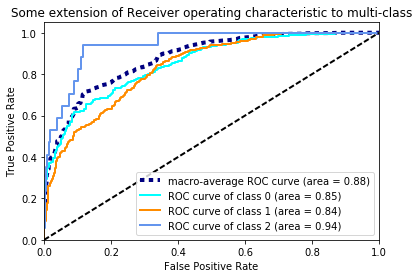

In [24]:
#                                            BERNOUILLI NAIVE - BAYES : PRINCIPAL COMPONENTS

from sklearn.naive_bayes import BernoulliNB
fList = ['MN_EARN_WNE_P10','CAT_EARN_0','CAT_EARN_1','CAT_EARN_2','PREDDEG','LOCALE','CONTROL']
X = data_train[list(filter(lambda x:x not in fList, columns))]

# ------------------------------------------- CAT_0
NBModel_pca = BernoulliNB()
pipe_pca = Pipeline([('scaling',StandardScaler()),('pca',pca),('lda',NBModel_pca)])
Y = Y_0
pipe_pca.fit(X, Y)

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
X_val = data_validation[X_columns]
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

# ROC ON VALIDATION

ROCX = X_val
ROCY = Y_0_val
scores = pipe_pca.predict_proba(ROCX)

fpr[0], tpr[0], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[0] = metrics.auc(fpr[0],tpr[0])

# ------------------------------------------- CAT_1
NBModel_pca = BernoulliNB()
pipe_pca = Pipeline([('scaling',StandardScaler()),('pca',pca),('lda',NBModel_pca)])
Y = Y_1
pipe_pca.fit(X, Y)
# ROC ON VALIDATION

ROCX = X_val
ROCY = Y_1_val
scores = pipe_pca.predict_proba(ROCX)

fpr[1], tpr[1], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[1] = metrics.auc(fpr[1],tpr[1])

# ------------------------------------------- CAT_1
NBModel_pca = BernoulliNB()
pipe_pca = Pipeline([('scaling',StandardScaler()),('pca',pca),('lda',NBModel_pca)])
Y = Y_2
pipe_pca.fit(X, Y)
# ROC ON VALIDATION

ROCX = X_val
ROCY = Y_2_val
scores = pipe_pca.predict_proba(ROCX)

fpr[2], tpr[2], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[2] = metrics.auc(fpr[2],tpr[2])

# ###################################### MACRO-AVERAGE PLOT#####################################
n_classes = 3
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

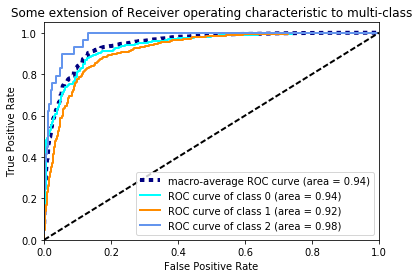

In [25]:
#  Best Model (Logistic Regresison without dimensionality reduction) on test dataset

# ----------------------------------------- CAT_0
LRModel = linear_model.LogisticRegression()
LRModel_pca = linear_model.LogisticRegression()


Y = Y_0
fList = ['MN_EARN_WNE_P10','CAT_EARN_0','CAT_EARN_1','CAT_EARN_2','PREDDEG','LOCALE','CONTROL']
X = data_train[list(filter(lambda x:x not in fList, columns))]

LRModel.fit(X, Y)

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
X_test = data_test[list(filter(lambda x:x not in fList, columns))]
# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

# ROC ON TEST

ROCX = X_test
ROCY = Y_test_0
scores = LRModel.predict_proba(ROCX)

fpr[0], tpr[0], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[0] = metrics.auc(fpr[0],tpr[0])

# -------------------------------------------- CAT_1
LRModel = linear_model.LogisticRegression()
Y = Y_1
fList = ['MN_EARN_WNE_P10','CAT_EARN_0','CAT_EARN_1','CAT_EARN_2','PREDDEG','LOCALE','CONTROL']
X = data_train[list(filter(lambda x:x not in fList, columns))]
LRModel.fit(X, Y)

# ROC ON VALIDATION

ROCX = X_test
ROCY = Y_test_1
scores = LRModel.predict_proba(ROCX)

fpr[1], tpr[1], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[1] = metrics.auc(fpr[1],tpr[1])

# -------------------------------------------- CAT_2
LRModel = linear_model.LogisticRegression()
Y = Y_2
fList = ['MN_EARN_WNE_P10','CAT_EARN_0','CAT_EARN_1','CAT_EARN_2','PREDDEG','LOCALE','CONTROL']
X = data_train[list(filter(lambda x:x not in fList, columns))]
LRModel.fit(X, Y)
# ROC ON VALIDATION
ROCX = X_test
ROCY = Y_test_2
scores = LRModel.predict_proba(ROCX)

fpr[2], tpr[2], thresholds = metrics.roc_curve(ROCY, scores[:,1], pos_label=1)
roc_auc[2] = metrics.auc(fpr[2],tpr[2])
# ###################################### MACRO-AVERAGE PLOT#####################################
n_classes = 3
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()